In [ ]:
!pip install xgboost
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**LOADING THE DATASET**

In [ ]:
train_df = pd.read_csv('Project_datasets/train_dataset.csv')
test_df = pd.read_csv('Project_datasets/test_dataset.csv')

# Combine (temporarily) for preprocessing
full_df = pd.concat([train_df, test_df], ignore_index=True)

**PREPROCESSING**

In [ ]:
# Drop columns
cols_to_drop = ['cc_num', 'trans_date_trans_time', 'first', 'last', 'dob', 'street', 'job']
full_df = full_df.drop(columns=cols_to_drop)

# Encode categorical variables
categorical_cols = full_df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    full_df[col] = le.fit_transform(full_df[col])

# Fill any missing values
full_df = full_df.fillna(0)

**SPLITTING IT INTO TRAIN & TEST DATA**

In [ ]:
train_data = full_df.iloc[:len(train_df)]
test_data = full_df.iloc[len(train_df):]

X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

**MODEL TRAINING**

In [ ]:
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**EVALUATING THE MODEL AND PLOTTING THE GRAPH**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    257905
         1.0       0.90      0.72      0.80      1430

    accuracy                           1.00    259335
   macro avg       0.95      0.86      0.90    259335
weighted avg       1.00      1.00      1.00    259335

ROC AUC Score: 0.8599072163369096


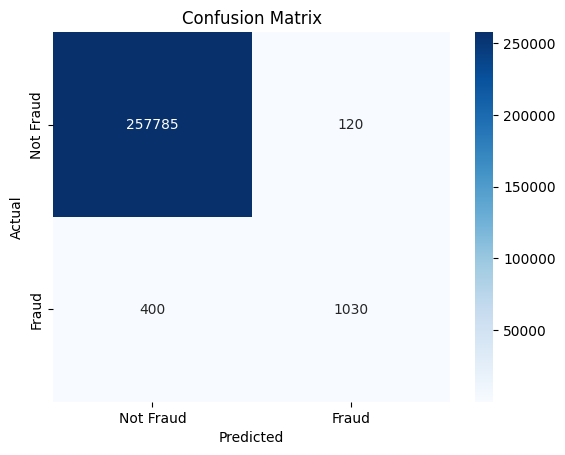

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred))

# Confusion matrix
#sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d',cmap='Blues')
#plt.show()
sns.heatmap( confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy = 99.79%